**Problem Statement:**

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 


In [ ]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from matplotlib import pyplot
import pickle

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sethukrish6420/sethuraman/main/train.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


**Understand the data**

In [ ]:
df.shape

(45211, 11)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df.nunique()

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

In [ ]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [ ]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [ ]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df['dur'].max()

642

In [ ]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

**Clean the data**

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df['job'] = df['job'].map(lambda x: 'blue-collar' if x == 'unknown' else x)

In [ ]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
df['education_qual'] = df['education_qual'].map(lambda x: 'secondary' if x == 'unknown' else x)

In [ ]:
df['education_qual'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

In [ ]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [ ]:
del df['call_type']

In [ ]:
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
del df['prev_outcome']

In [ ]:
df.shape

(45211, 9)

In [ ]:
df.head(3)

,age,job,marital,education_qual,day,mon,dur,num_calls,y
0,58,management,married,tertiary,5,may,261,1,no
1,44,technician,single,secondary,5,may,151,1,no
2,33,entrepreneur,married,secondary,5,may,76,1,no


In [ ]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


**Checking Outliers**

In [ ]:
# In age column

iqr = 48-33
iqr

15

In [ ]:
lower_fence = 33 - 1.5*iqr
lower_fence

10.5

In [ ]:
upper_fence = 48 + 1.5*iqr
upper_fence

70.5

In [ ]:
df = df[ df['age'] < upper_fence]
df = df[df['age'] > lower_fence]

In [ ]:
df['age'].describe()

count    44724.000000
mean        40.545524
std          9.978232
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

In [ ]:
# In day column
iqr = 21- 8
iqr

13

In [ ]:
df = df[df['day'] > (8 - (1.5*iqr))]
df = df[df['day'] < (21 + (1.5*iqr))]

In [ ]:
df['day'].describe()

count    44724.000000
mean        15.812718
std          8.324820
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [ ]:
# In dur column
iqr = 319 - 103
iqr

216

In [ ]:
df = df[df['dur'] > (103 - (1.5*iqr))]
df = df[df['dur'] < (319 + (1.5*iqr))]
df['dur'].describe()

count    41531.000000
mean       202.784763
std        140.528686
min          0.000000
25%         98.000000
50%        167.000000
75%        276.000000
max        642.000000
Name: dur, dtype: float64

In [ ]:
# In num_calls column
iqr = 3 - 1
iqr

2

In [ ]:
df = df[df['num_calls'] > (1 - (1.5*iqr))]
df = df[df['num_calls'] < (3 + (1.5*iqr))]
df['num_calls'].describe()

count    37449.000000
mean         2.004807
std          1.140395
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: num_calls, dtype: float64

In [ ]:
df.drop_duplicates()

,age,job,marital,education_qual,day,mon,dur,num_calls,y
0,58,management,married,tertiary,5,may,261,1,no
1,44,technician,single,secondary,5,may,151,1,no
2,33,entrepreneur,married,secondary,5,may,76,1,no
3,47,blue-collar,married,secondary,5,may,92,1,no
4,33,blue-collar,single,secondary,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,17,nov,224,1,yes
45203,23,student,single,tertiary,17,nov,266,1,yes
45205,25,technician,single,secondary,17,nov,386,2,yes
45209,57,blue-collar,married,secondary,17,nov,508,4,no


In [ ]:
df.shape

(37449, 9)

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
day                int64
mon               object
dur                int64
num_calls          int64
y                 object
dtype: object

**visualization**

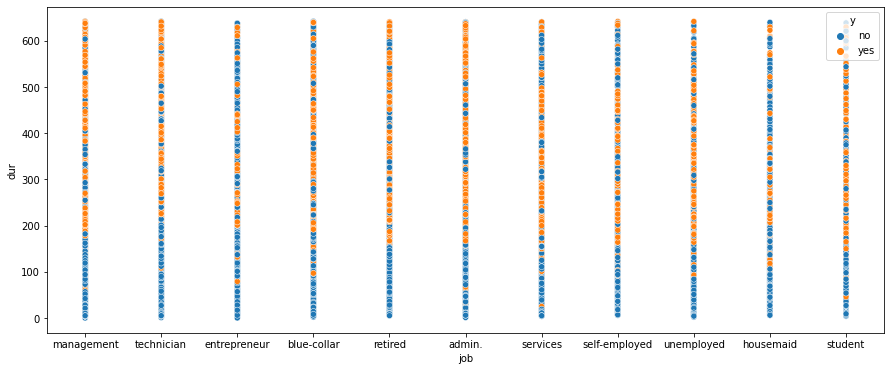

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(data=df,x='job',y='dur',hue='y')

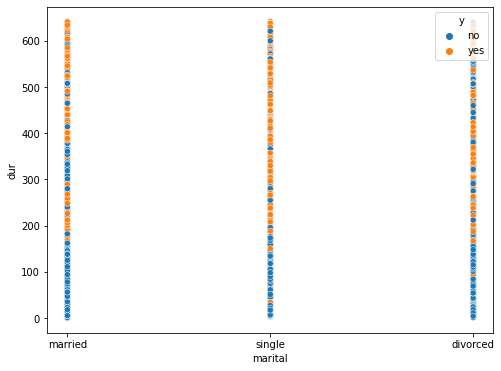

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='marital',y='dur',hue='y')

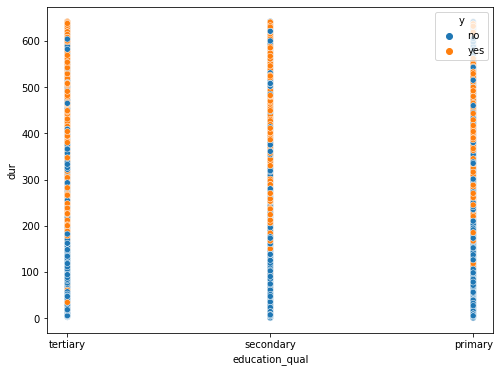

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='education_qual',y='dur',hue='y')

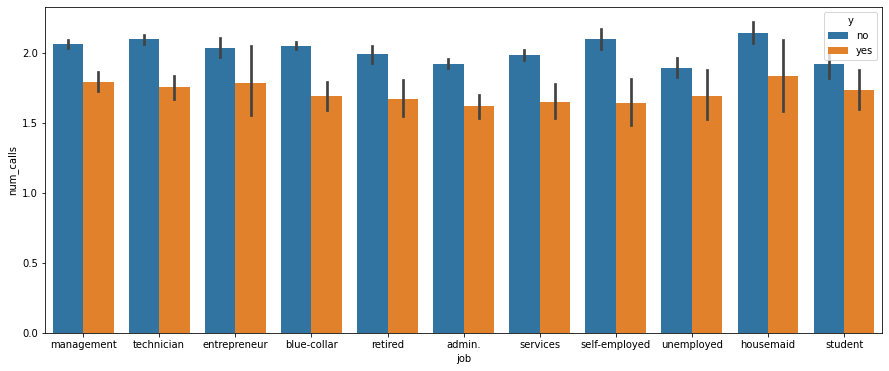

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(data=df,x='job',y='num_calls',hue='y')

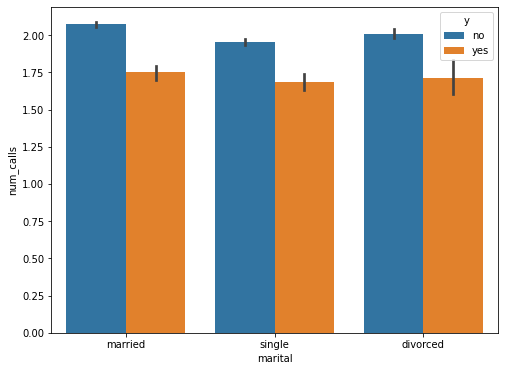

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(data=df,x='marital',y='num_calls',hue='y')

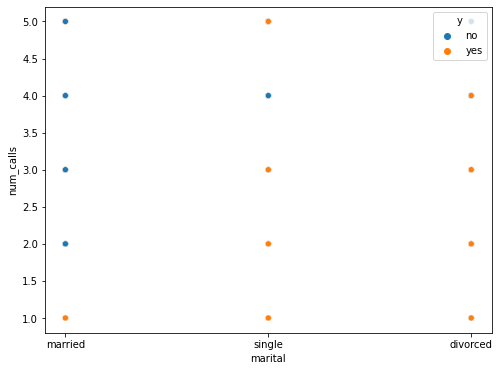

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='marital',y='num_calls',hue='y')

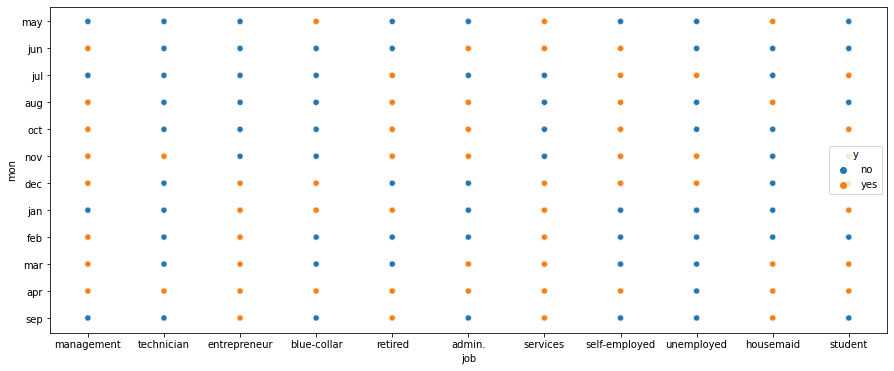

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(data=df,x='job',y='mon',hue='y')

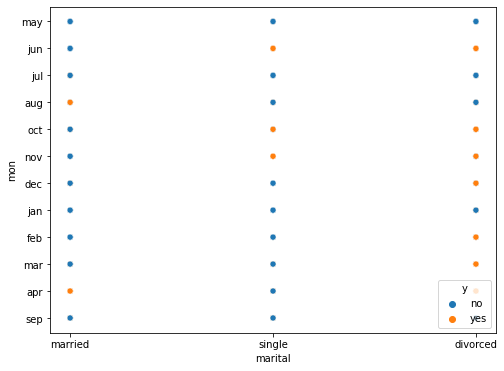

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='marital',y='mon',hue='y')

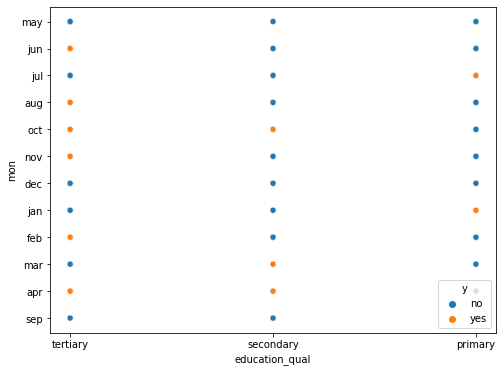

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='education_qual',y='mon',hue='y')

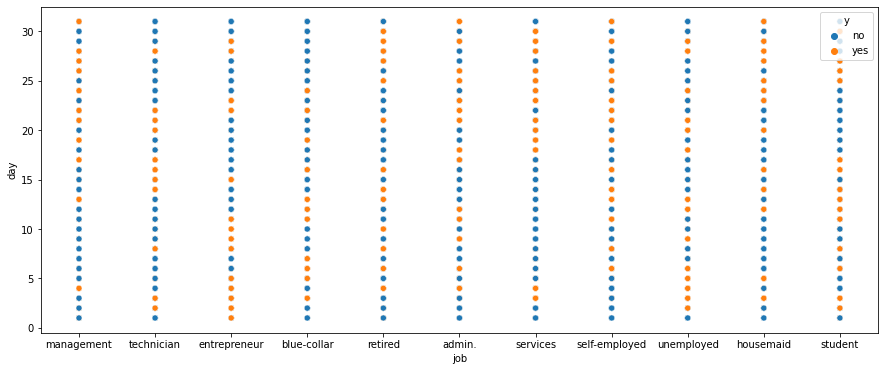

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(data=df,x='job',y='day',hue='y')

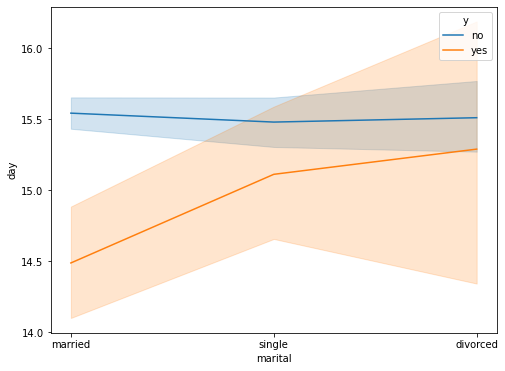

In [ ]:
plt.figure(figsize = (8,6))
sns.lineplot(data=df,x='marital',y='day',hue='y')

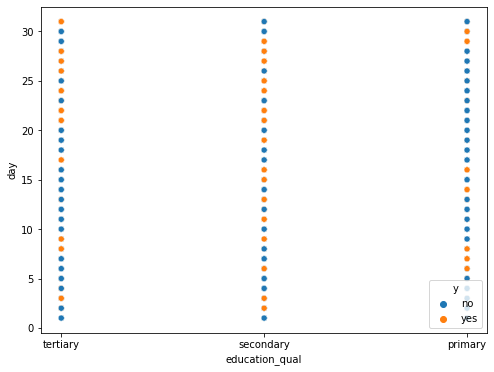

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='education_qual',y='day',hue='y')

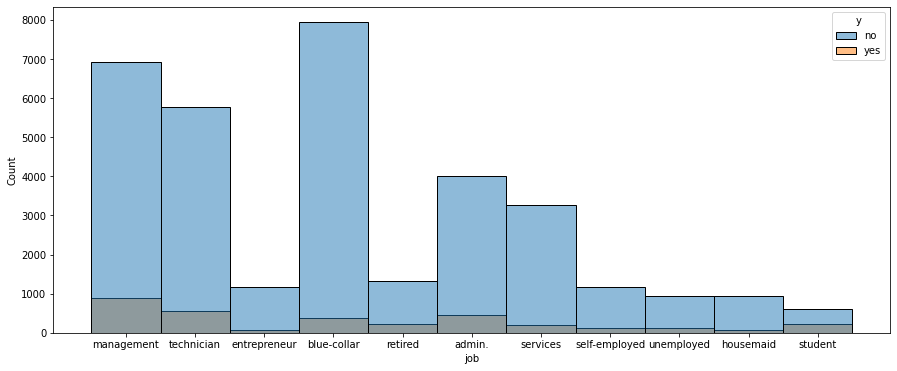

In [ ]:
plt.figure(figsize = (15,6))
sns.histplot(data=df,x='job',hue='y')

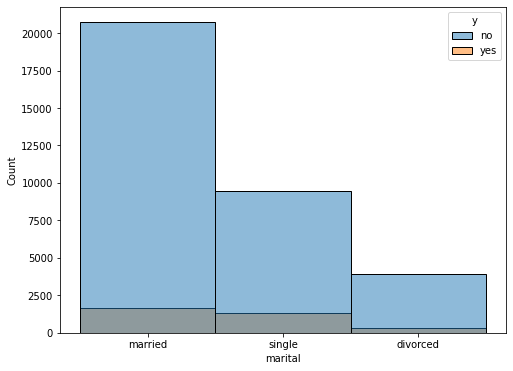

In [ ]:
plt.figure(figsize = (8,6))
sns.histplot(data=df,x='marital',hue='y')

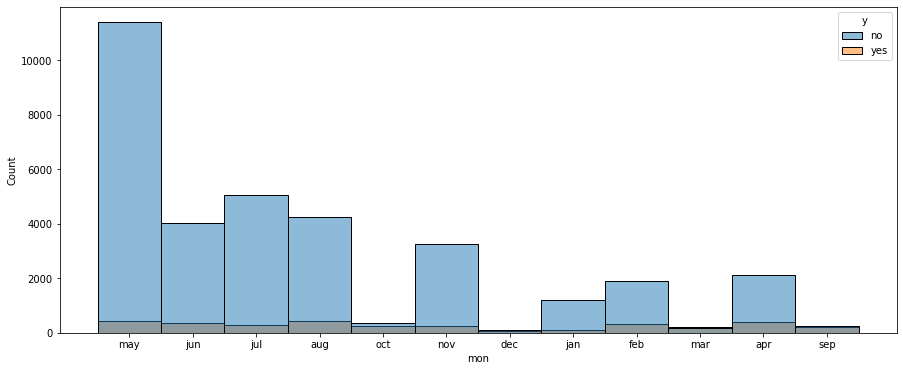

In [ ]:
plt.figure(figsize = (15,6))
sns.histplot(data=df,x='mon',hue='y')

**Encode the data**

In [ ]:
df1 = df

In [ ]:
df1["job"] = df1["job"].map({'entrepreneur': 0,'housemaid':1,'unemployed':2,'self-employed':3,'retired':4,'services':5,'student':6,
                             'blue-collar':7,'admin.':8,'technician':9,'management':10})
df1["marital"] = df1["marital"].map({"divorced" : 0, "single" : 1,"married" : 2})
df1["education_qual"] = df1["education_qual"].map({"primary" : 0, "secondary" : 1,"tertiary" : 2})
df1["mon"] = df1["mon"].map({'dec': 0,'jan':1,'mar':2,'sep':3,'oct':4,'nov':5,'feb':6,
                             'jul':7,'jun':8,'aug':9,'apr':10,'may':11})
df1["y"] = df1["y"].map({"yes" : 1, "no" : 0})

In [ ]:

df1.head(2)

,age,job,marital,education_qual,day,mon,dur,num_calls,y
0,58,10,2,2,5,11,261,1,0
1,44,9,1,1,5,11,151,1,0


In [ ]:
df1['y'].value_counts()

0    34120
1     3329
Name: y, dtype: int64

In [ ]:
# In this data 0 is morethan 75% so it is imbalanced data so convert into balanced data

In [ ]:
df1.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'mon', 'dur',
       'num_calls', 'y'],
      dtype='object')

In [ ]:
x = df1[['age', 'job', 'marital', 'education_qual', 'day', 'mon', 'dur',
       'num_calls']].values

y = df1['y'].values

In [ ]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x, y)

In [ ]:
from collections import Counter

In [ ]:
print(Counter(y))
print(Counter(y_smt))

Counter({0: 34120, 1: 3329})
Counter({1: 32323, 0: 24437})


In [ ]:
# so the data is balanced

In [ ]:
# split the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smt,y_smt,test_size=0.25)

In [ ]:
# Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc =scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
# modeling the data
# In this data is classification data so to do all the classification ml models

In [ ]:
# logistic regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
log.predict_proba(x_test)

array([[0.20364965, 0.79635035],
       [0.97861294, 0.02138706],
       [0.8692284 , 0.1307716 ],
       ...,
       [0.56934537, 0.43065463],
       [0.96948573, 0.03051427],
       [0.57305107, 0.42694893]])

In [ ]:
# score the data
score = log.score(x_test,y_test)
score

0.812262156448203

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
accuracy_score(y_test,y_pred)

0.812262156448203

In [ ]:
f1_score(y_test,y_pred)

0.8366245553783883

In [ ]:
roc_auc_score(y_test,log.predict_proba(x_test)[:,1])

0.8893204023996774

In [ ]:
# knn model 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  print('K_value : ',i, 'cv_score: ',np.mean(cross_val_score(knn,x_train,y_train,cv=10,scoring='roc_auc')))

K_value :  1 cv_score:  0.914401611944007
K_value :  2 cv_score:  0.937677046769973
K_value :  3 cv_score:  0.9469306707303902
K_value :  4 cv_score:  0.9507521056298295
K_value :  5 cv_score:  0.9526716288973216
K_value :  6 cv_score:  0.9537071637523976
K_value :  7 cv_score:  0.9537649349916254
K_value :  8 cv_score:  0.9540086635308466
K_value :  9 cv_score:  0.9536847620520099
K_value :  10 cv_score:  0.9530843982327747
K_value :  20 cv_score:  0.9492826409650645
K_value :  50 cv_score:  0.940213473960509


In [ ]:
# so in this data k=9 is a best value

In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.893446088794926

In [ ]:
# evaluation
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,knn.predict_proba(x_test)[:,1])

0.9553579065754407

In [ ]:
# Desicion tree classification 

In [ ]:
# Find the best depth value
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth = i)
  dt.fit(x_train,y_train)
  print('depth_value = ', i , 'cv_score = ',np.mean(cross_val_score(dt,x_train,y_train,cv=10)))

depth_value =  1 cv_score =  0.7486257928118393
depth_value =  2 cv_score =  0.8132017852948085
depth_value =  3 cv_score =  0.8323937044867277
depth_value =  4 cv_score =  0.8348837209302327
depth_value =  5 cv_score =  0.851797040169133
depth_value =  6 cv_score =  0.8620155038759689
depth_value =  7 cv_score =  0.8691331923890063
depth_value =  8 cv_score =  0.8811369509043928
depth_value =  9 cv_score =  0.8863049095607234
depth_value =  10 cv_score =  0.8945501526896876


In [ ]:
# best depth = 10

In [ ]:
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.8919661733615222

In [ ]:
#evaluation
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(x_train,y_train)
roc_auc_score(y_test,dt.predict_proba(x_test)[:,1])

0.9478844523840092

In [ ]:
# Feature importance

dt = DecisionTreeClassifier(max_depth = 10)

dt.fit(x_train, y_train)
importance = dt.feature_importances_
feature_names = np.array(['age', 'job', 'marital', 'education_qual', 'day', 'mon', 'dur',
       'num_calls'])
for feature_name, importance in zip(feature_names, importance):
    print(f"{feature_name}: {importance:.4f}")

age: 0.0510
job: 0.0161
marital: 0.0488
education_qual: 0.0037
day: 0.0821
mon: 0.2839
dur: 0.4689
num_calls: 0.0455


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


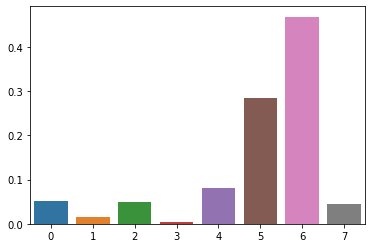

In [ ]:
importance = dt.feature_importances_
sns.barplot([x for x in range(len(importance))],importance)

So in this data the feature importants are,
1.   duration
2.   month
3.   day
4.   age


In [ ]:
# voting Classifier
from sklearn.ensemble import VotingClassifier
model_1 = LogisticRegression()
model_2 = DecisionTreeClassifier(max_depth = 10)
model_3 = KNeighborsClassifier(9)
vc = VotingClassifier(estimators = [('lr',model_1),('dt',model_2),('knn',model_3)],voting='soft')
vc.fit(x_train,y_train)
y_pred = vc.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
vc.score(x_test,y_test)

0.9012684989429175

In [ ]:
# Evaluation
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,vc.predict_proba(x_test)[:,1])

0.9604384422147116

In [ ]:
# Random Foresting
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth = 10,max_features=  'sqrt')
rf = rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.8994362226920366

In [ ]:
# Evaluation
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,rfc.predict_proba(x_test)[:,1])

0.9630560152174032

In [ ]:
# XGboost

import xgboost as xgb
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12]:
  xb = xgb.XGBClassifier(learning_rate = lr,n_estimators=100,verbosity = 0)
  xb.fit(x_train,y_train)
  print('lr value = ',lr,'cv_score = ', np.mean(cross_val_score(xb,x_train,y_train,cv=10)))

lr value =  0.01 cv_score =  0.8469579516091145
lr value =  0.02 cv_score =  0.8546629081512803
lr value =  0.03 cv_score =  0.861522198731501
lr value =  0.04 cv_score =  0.8685929058022082
lr value =  0.05 cv_score =  0.8743011510453371
lr value =  0.06 cv_score =  0.8782241014799155
lr value =  0.07 cv_score =  0.8813953488372095
lr value =  0.08 cv_score =  0.8844491425886776
lr value =  0.09 cv_score =  0.8871035940803382
lr value =  0.1 cv_score =  0.8897345548508341
lr value =  0.11 cv_score =  0.8916842847075406
lr value =  0.12 cv_score =  0.8938219403335683


In [ ]:
xb = xgb.XGBClassifier(learning_rate = 0.12,n_estimators=100,verbosity = 0)
xb.fit(x_train,y_train)
xb.score(x_test,y_test)

0.8916138125440451

In [ ]:
# Evaluation
from sklearn.metrics import roc_auc_score
xb = xgb.XGBClassifier(learning_rate = 0.12,n_estimators=100,verbosity = 0)
xb.fit(x_train,y_train)
roc_auc_score(y_test,xb.predict_proba(x_test)[:,1])

0.9568778662391031

In [ ]:
# So all the above modeling the best model is RandomForestingClassifier


**For Prediction:**

In [ ]:
with open('scale.pkl', 'wb') as f:
    pickle.dump(sc, f)

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
with open('scale.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [ ]:
with open('model.pkl', 'rb') as f:
    xb = pickle.load(f)

In [ ]:
test = scaler.transform([[44,9,1,1,5,11,151,63]])

In [ ]:
prediction = xb.predict(test)
prediction

array([0])

**So in this data the feature importants are,**

1.  Duration of call 
2.  Month of call
3.  Day of call
4.  Age of the person